In [2]:
import numpy as np 
import pandas as pd
import librosa
import matplotlib.pylab as plt
import IPython.display as ipd
from PIL import Image

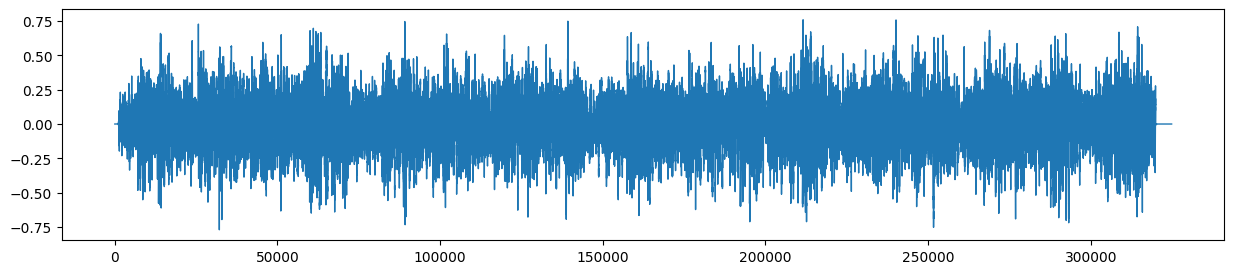

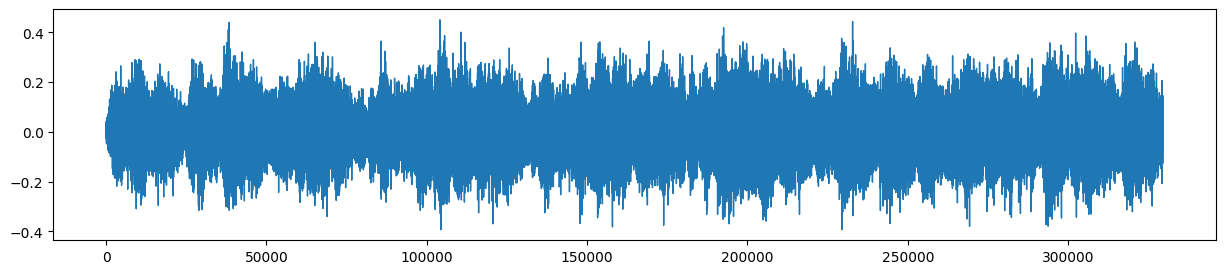

In [8]:
size = (1025, 430)
     

style_path = "audio/style.mp3"
content_path = "audio/content.mp3"

def audio_loader(path):
    audio, sr = librosa.load(path)
    display(ipd.Audio(audio, rate=22050))
    pd.Series(audio).plot(figsize=(15,3), lw=1)
    plt.show()
    return audio, sr


     
content, sr = audio_loader(content_path)
style, _ = audio_loader(style_path)

In [13]:
def Audio_to_Image(audio):
    audio_stft=librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128*2)
    S_db = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
    return S_db
    

def Image_to(img, mag_min, mag_max):
    mag_norm = np.array(img, dtype=np.float32) / 255
    mag = mag_norm * (mag_max - mag_min) + mag_min
    mag = np.exp(mag) - 1
    return librosa.griffinlim(mag)

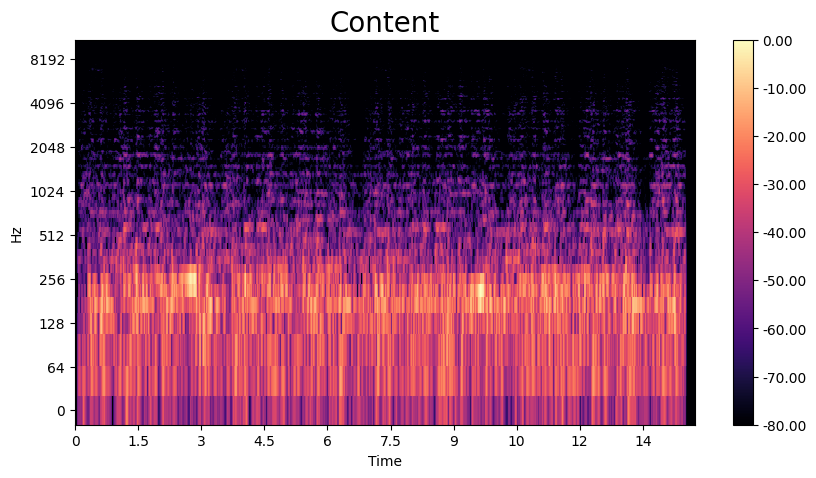

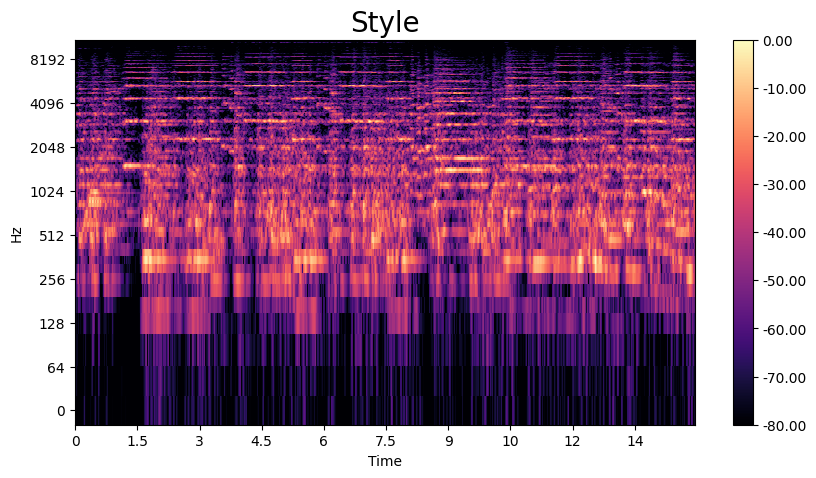

In [14]:
content_img= Audio_to_Image(content)
fig1, ax = plt.subplots(figsize=(10, 5))
img1 = librosa.display.specshow(content_img, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Content', fontsize=20)
fig1.colorbar(img1, ax=ax, format=f'%0.2f')
plt.show()

style_img = Audio_to_Image(style)
fig2, ax = plt.subplots(figsize=(10, 5))
img2 = librosa.display.specshow(style_img, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Style', fontsize=20)
fig2.colorbar(img2, ax=ax, format=f'%0.2f')
plt.show()